In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
# Cargar el nuevo archivo para inspeccionar su contenido
new_file_path = 'C:/Users/Usuario/PI_2/DATA_LIMPIO/Velocidad % por prov.csv'

# Cargar el archivo CSV en un DataFrame
df_new = pd.read_csv(new_file_path)

# Mostrar la información del nuevo DataFrame
df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB


In [6]:
# Importar pandas para trabajar con el archivo
import pandas as pd

# Ruta del nuevo archivo
new_file_path = 'C:/Users/Usuario/PI_2/DATA_LIMPIO/Velocidad % por prov.csv'

# Cargar el archivo
df_new = pd.read_csv(new_file_path)

# 1. Convertir 'Año' a tipo fecha (solo año) y 'Trimestre' a periodo trimestral
df_new['Año'] = pd.to_datetime(df_new['Año'], format='%Y').dt.year
df_new['Trimestre'] = pd.PeriodIndex(year=df_new['Año'], quarter=df_new['Trimestre'], freq='Q')

# 2. Revisar y eliminar valores nulos
df_new = df_new.dropna()

# 3. Revisar y eliminar valores negativos
for col in df_new.select_dtypes(include=['float64', 'int64']):
    df_new = df_new[df_new[col] >= 0]

# 4. Filtrar los datos entre 2018 y 2024
df_new = df_new[(df_new['Año'] >= 2018) & (df_new['Año'] <= 2024)]

# 5. Relacionar Año, Trimestre, Provincia y Mbps (Media de bajada)
resumen = df_new.groupby(['Año', 'Trimestre', 'Provincia']).mean()

# Guardar el DataFrame limpio para su uso en VSCode
output_path = 'C:/Users/Usuario/PI_2/DATA_LIMPIO/Velocidad_por_provincia_limpio.csv'
df_new.to_csv(output_path, index=False)

# Mostrar el DataFrame limpio y el archivo guardado
df_new.head(), output_path


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16544\1272443854.py:12: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  df_new['Trimestre'] = pd.PeriodIndex(year=df_new['Año'], quarter=df_new['Trimestre'], freq='Q')


(    Año Trimestre        Provincia  Mbps (Media de bajada)
 0  2024    2024Q2     Buenos Aires                  157.41
 1  2024    2024Q2  Capital Federal                  233.01
 2  2024    2024Q2        Catamarca                   97.38
 3  2024    2024Q2            Chaco                  107.76
 4  2024    2024Q2           Chubut                   21.67,
 'C:/Users/Usuario/PI_2/DATA_LIMPIO/Velocidad_por_provincia_limpio.csv')

    Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2024          2     Buenos Aires                  157.41
1  2024          2  Capital Federal                  233.01
2  2024          2        Catamarca                   97.38
3  2024          2            Chaco                  107.76
4  2024          2           Chubut                   21.67
Año   Trimestre  Provincia          
2014  1          Buenos Aires             3.733133
                 Capital Federal          4.024082
                 Catamarca                2.802734
                 Chaco                    3.255837
                 Chubut                   3.175917
                                           ...    
2024  2          Santa Cruz              29.890000
                 Santa Fe               102.510000
                 Santiago Del Estero     48.950000
                 Tierra Del Fuego        22.090000
                 Tucumán                108.930000
Name: Mbps (Media de bajada), Length: 1008

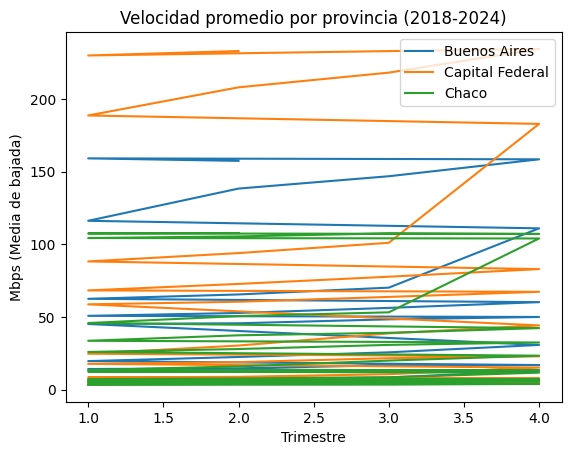

In [7]:
import pandas as pd

# Cargar el archivo limpio
file_path = 'C:/Users/Usuario/PI_2/DATA_LIMPIO/Velocidad % por prov.csv'

# Leer el archivo
df = pd.read_csv(file_path)

# Mostrar primeras filas
print(df.head())

# Relacionar Año, Trimestre y Mbps (Media de bajada) por provincia
resumen = df.groupby(['Año', 'Trimestre', 'Provincia'])['Mbps (Media de bajada)'].mean()
print(resumen)

# Visualización rápida
import matplotlib.pyplot as plt

# Comparar velocidad promedio en provincias específicas
provincias_interes = ['Buenos Aires', 'Capital Federal', 'Chaco']
df_filtrado = df[df['Provincia'].isin(provincias_interes)]

# Gráfico
for provincia in provincias_interes:
    datos = df_filtrado[df_filtrado['Provincia'] == provincia]
    plt.plot(datos['Trimestre'], datos['Mbps (Media de bajada)'], label=provincia)

plt.xlabel('Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Velocidad promedio por provincia (2018-2024)')
plt.legend()
plt.show()


In [8]:
import pandas as pd

# Cargar el archivo CSV
file_path = "C:/Users/Usuario/PI_2/DATA_LIMPIO/Velocidad % por prov.csv"
df = pd.read_csv(file_path)

# Filtrar datos entre 2018 y 2024
df_filtered = df[(df['Año'] >= 2018) & (df['Año'] <= 2024)]

# Convertir la columna 'Año' a tipo datetime y mantener solo el año
df_filtered['Año'] = pd.to_datetime(df_filtered['Año'], format='%Y').dt.year

# Convertir la columna 'Trimestre' a tipo período trimestral
df_filtered['Trimestre'] = (
    df_filtered['Año'].astype(str) + "Q" + df_filtered['Trimestre'].astype(str)
)
df_filtered['Trimestre'] = pd.PeriodIndex(df_filtered['Trimestre'], freq='Q')

# Eliminar valores negativos en 'Mbps (Media de bajada)'
df_filtered = df_filtered[df_filtered['Mbps (Media de bajada)'] >= 0]

# Guardar el DataFrame limpio
df_filtered.to_csv("Velocidad_filtrada.csv", index=False)

# Información básica del DataFrame resultante
print(df_filtered.info())

# Estadísticas descriptivas
print(df_filtered.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 624 entries, 0 to 623
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype        
---  ------                  --------------  -----        
 0   Año                     624 non-null    int32        
 1   Trimestre               624 non-null    period[Q-DEC]
 2   Provincia               624 non-null    object       
 3   Mbps (Media de bajada)  624 non-null    float64      
dtypes: float64(1), int32(1), object(1), period[Q-DEC](1)
memory usage: 21.9+ KB
None
               Año  Mbps (Media de bajada)
count   624.000000              624.000000
mean   2020.769231               37.065189
std       1.888875               37.799242
min    2018.000000                3.995131
25%    2019.000000               11.440113
50%    2021.000000               22.519291
75%    2022.000000               45.930000
max    2024.000000              234.440000


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16544\2515363025.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Año'] = pd.to_datetime(df_filtered['Año'], format='%Y').dt.year
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16544\2515363025.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Trimestre'] = (
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16544\2515363025.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [9]:
df_filtered.loc[:, 'Año'] = pd.to_datetime(df_filtered['Año'], format='%Y').dt.year


In [10]:
df_filtered = df_filtered.copy()
df_filtered['Año'] = pd.to_datetime(df_filtered['Año'], format='%Y').dt.year


In [11]:
# Asegúrate de crear una copia explícita para trabajar
df_filtered = df_filtered.copy()

# Convertir 'Año' al formato numérico
df_filtered['Año'] = pd.to_datetime(df_filtered['Año'], format='%Y').dt.year

# Convertir 'Trimestre' al formato de periodos trimestrales
df_filtered['Trimestre'] = pd.PeriodIndex(df_filtered['Trimestre'], freq='Q')


In [1]:
import pandas as pd

# Ruta del archivo original
file_path = 'C:/Users/Usuario/PI_2/DATA_LIMPIO/Velocidad % por prov.csv'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(file_path)

# 1. Convertir 'Año' a tipo fecha y 'Trimestre' a periodo trimestral
df['Año'] = pd.to_datetime(df['Año'], format='%Y').dt.year
df['Trimestre'] = pd.PeriodIndex.from_fields(year=df['Año'], quarter=df['Trimestre'], freq='Q')

# 2. Eliminar valores nulos
df = df.dropna()

# 3. Eliminar valores negativos (si existen)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    df = df[df[col] >= 0]

# 4. Filtrar años dentro del rango 2018-2024
df = df[(df['Año'] >= 2018) & (df['Año'] <= 2024)]

# 5. Guardar las transformaciones en el mismo archivo
df.to_csv(file_path, index=False)

# Mostrar el DataFrame limpio
print("Transformaciones guardadas exitosamente.")
print(df.head())


Transformaciones guardadas exitosamente.
    Año Trimestre        Provincia  Mbps (Media de bajada)
0  2024    2024Q2     Buenos Aires                  157.41
1  2024    2024Q2  Capital Federal                  233.01
2  2024    2024Q2        Catamarca                   97.38
3  2024    2024Q2            Chaco                  107.76
4  2024    2024Q2           Chubut                   21.67


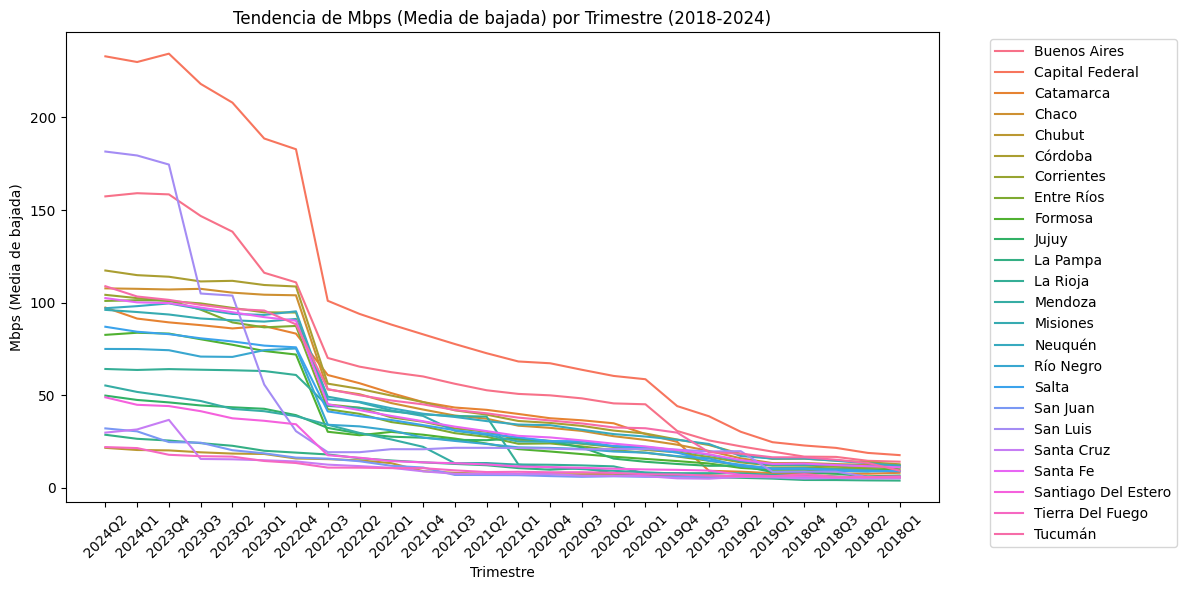

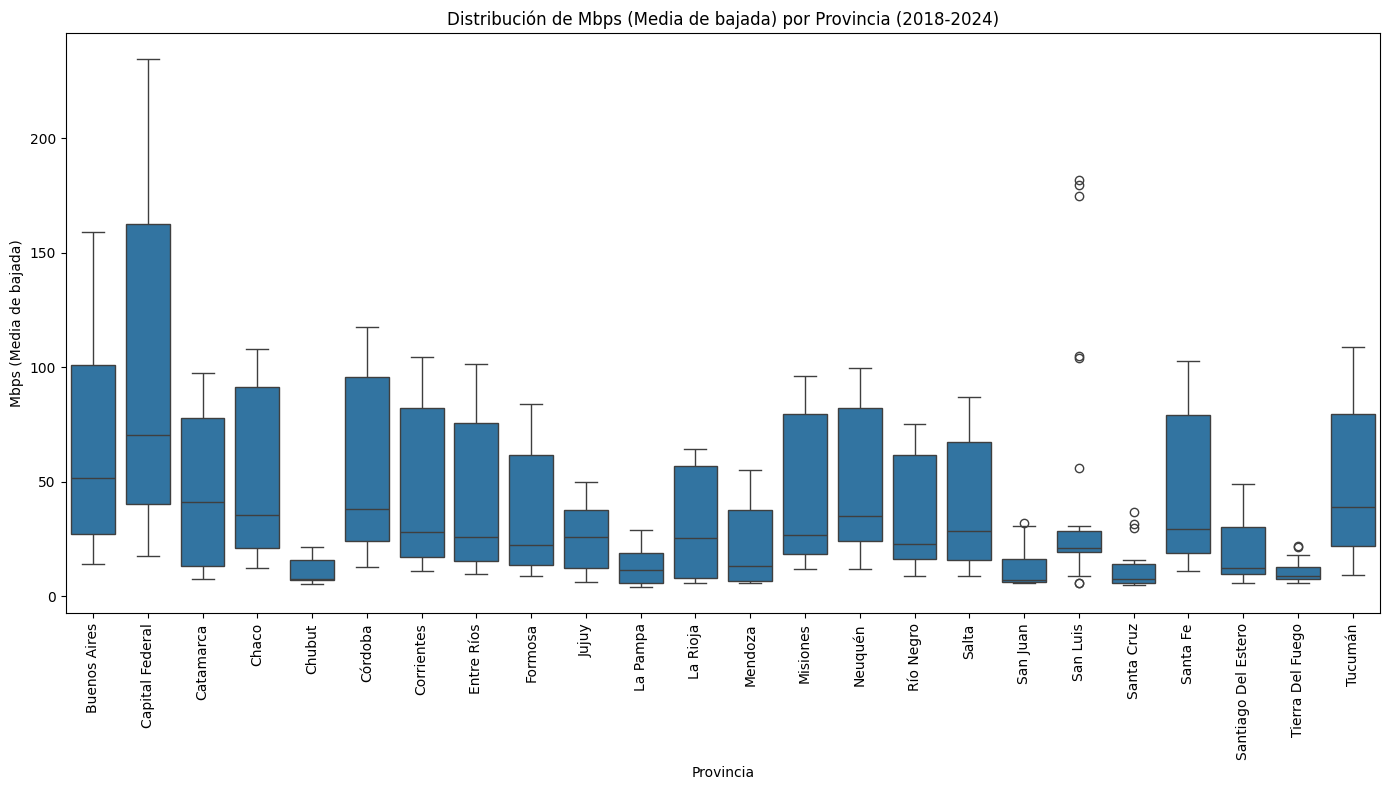

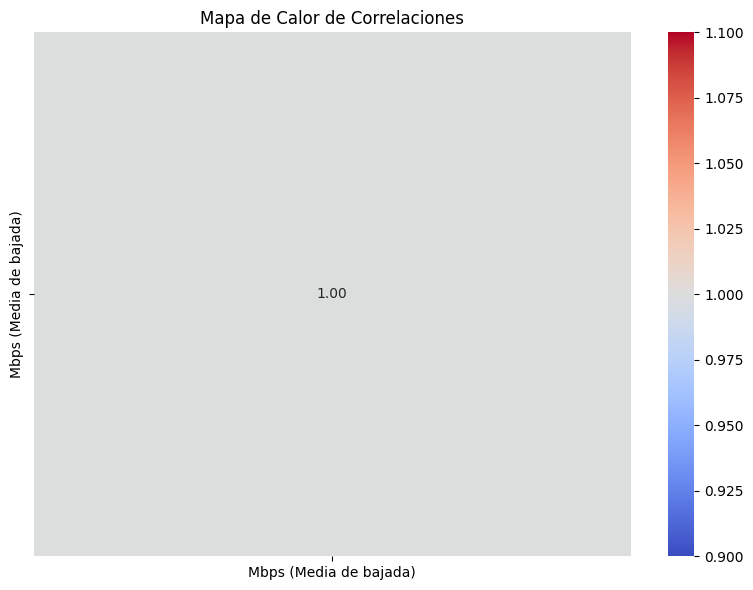

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Filtrar datos entre 2018 y 2024
df = df[(df['Año'] >= 2018) & (df['Año'] <= 2024)]

# Visualización 1: Tendencia de Mbps (Media de bajada) por año y trimestre
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x="Trimestre",
    y="Mbps (Media de bajada)",
    hue="Provincia",
    estimator="mean",
    errorbar=None  # Sustituye el uso de ci=None
)
plt.title("Tendencia de Mbps (Media de bajada) por Trimestre (2018-2024)")
plt.xlabel("Trimestre")
plt.ylabel("Mbps (Media de bajada)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Visualización 2: Boxplot de Mbps (Media de bajada) por Provincia
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df,
    x="Provincia",
    y="Mbps (Media de bajada)"
)
plt.title("Distribución de Mbps (Media de bajada) por Provincia (2018-2024)")
plt.xlabel("Provincia")
plt.ylabel("Mbps (Media de bajada)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualización 3: Heatmap de correlaciones entre columnas numéricas
plt.figure(figsize=(8, 6))
correlation = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.tight_layout()
plt.show()


In [5]:
# Resumen estadístico
print("Resumen Estadístico (describe):")
print(df.describe(include='all'))  # Incluye todas las columnas, incluso no numéricas

# Información general del DataFrame
print("\nInformación General (info):")
print(df.info())

# Verificar valores únicos por columna
print("\nValores Únicos por Columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

# Mostrar los primeros registros para inspeccionar
print("\nPrimeras Filas del DataFrame:")
print(df.head())


Resumen Estadístico (describe):
                Año Trimestre     Provincia  Mbps (Media de bajada)
count    624.000000       624           624              624.000000
unique          NaN        26            24                     NaN
top             NaN    2024Q2  Buenos Aires                     NaN
freq            NaN        24            26                     NaN
mean    2020.769231       NaN           NaN               37.065189
std        1.888875       NaN           NaN               37.799242
min     2018.000000       NaN           NaN                3.995131
25%     2019.000000       NaN           NaN               11.440113
50%     2021.000000       NaN           NaN               22.519291
75%     2022.000000       NaN           NaN               45.930000
max     2024.000000       NaN           NaN              234.440000

Información General (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 4 columns):
 #   Column        

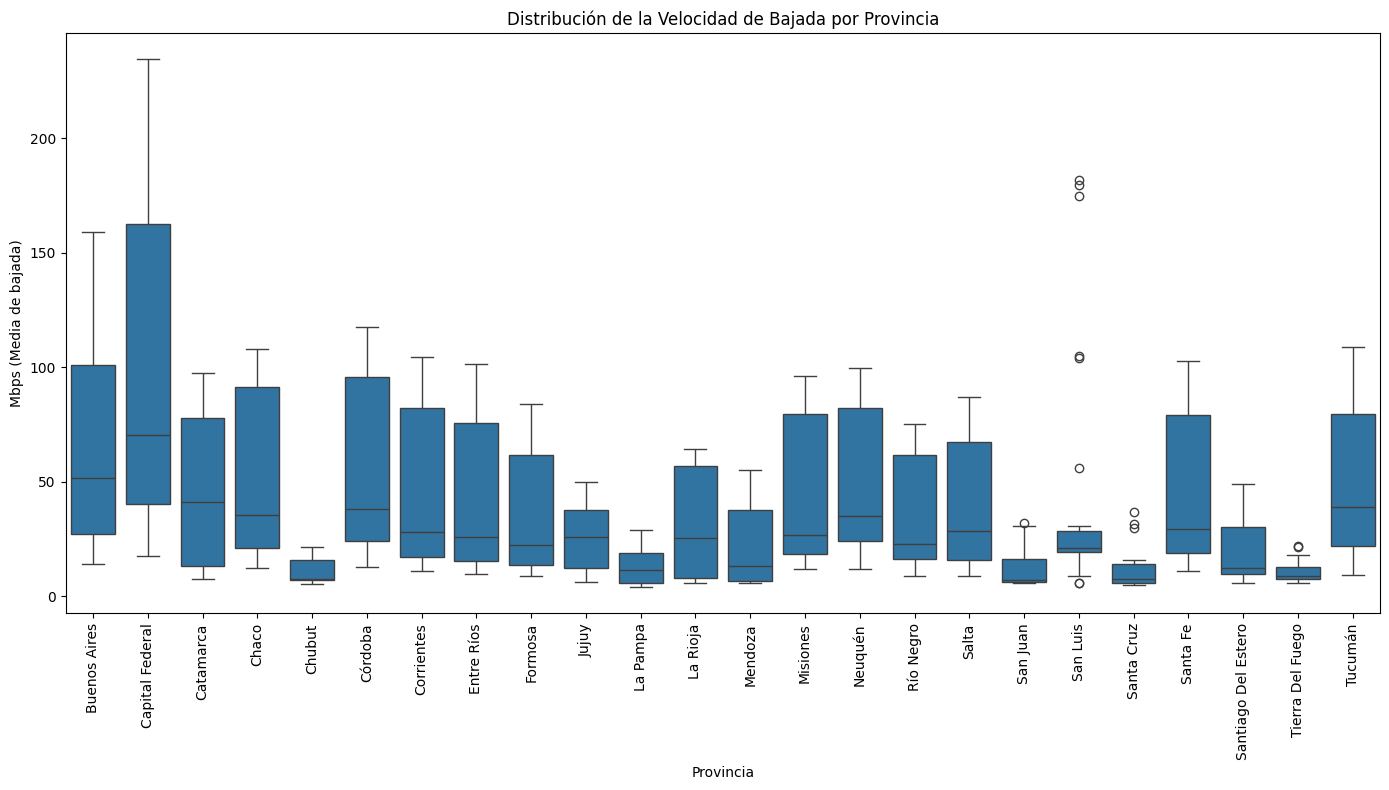

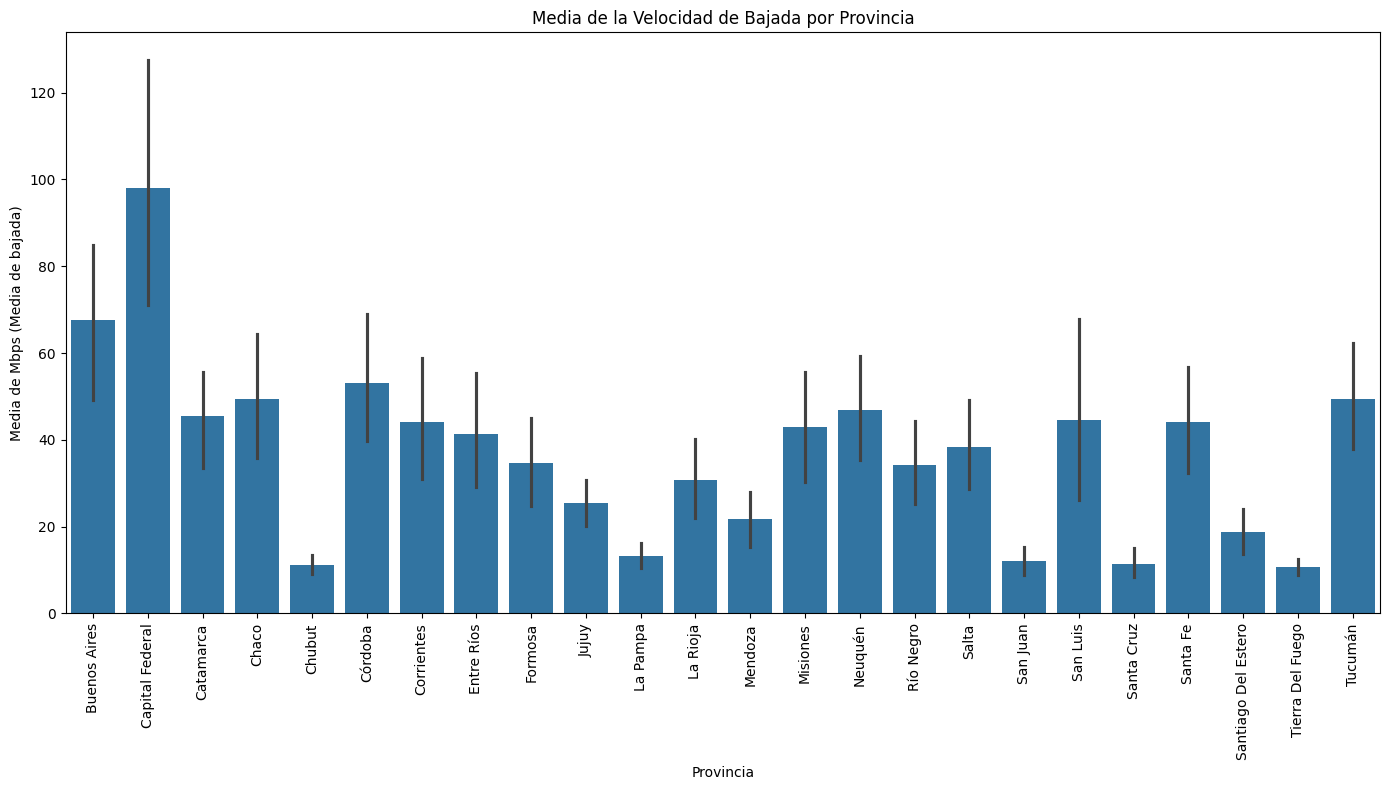

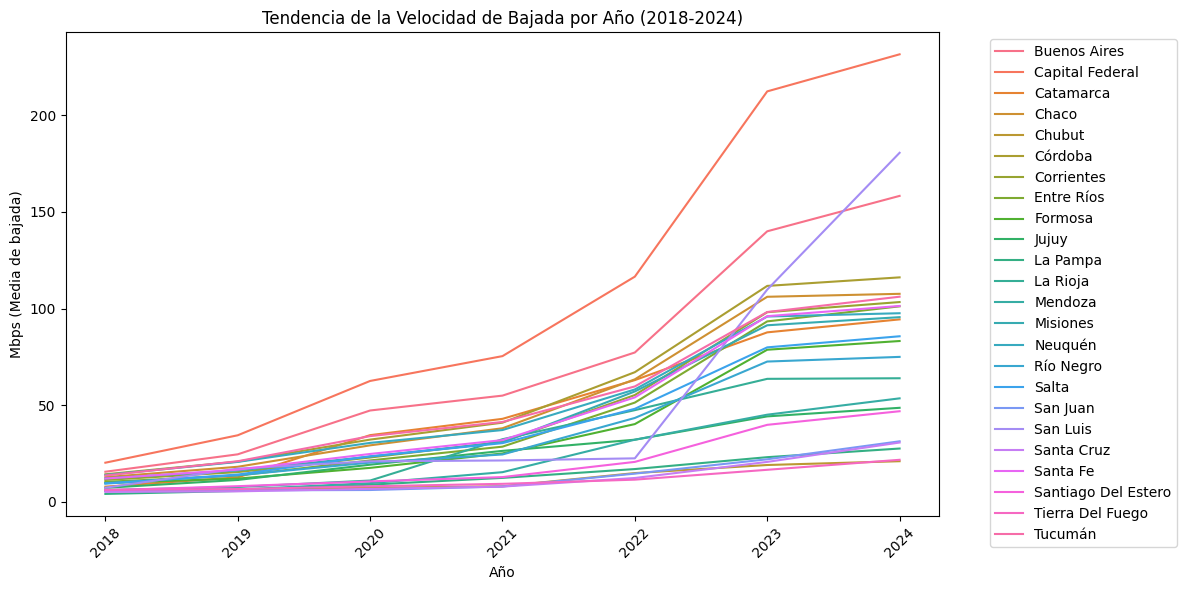

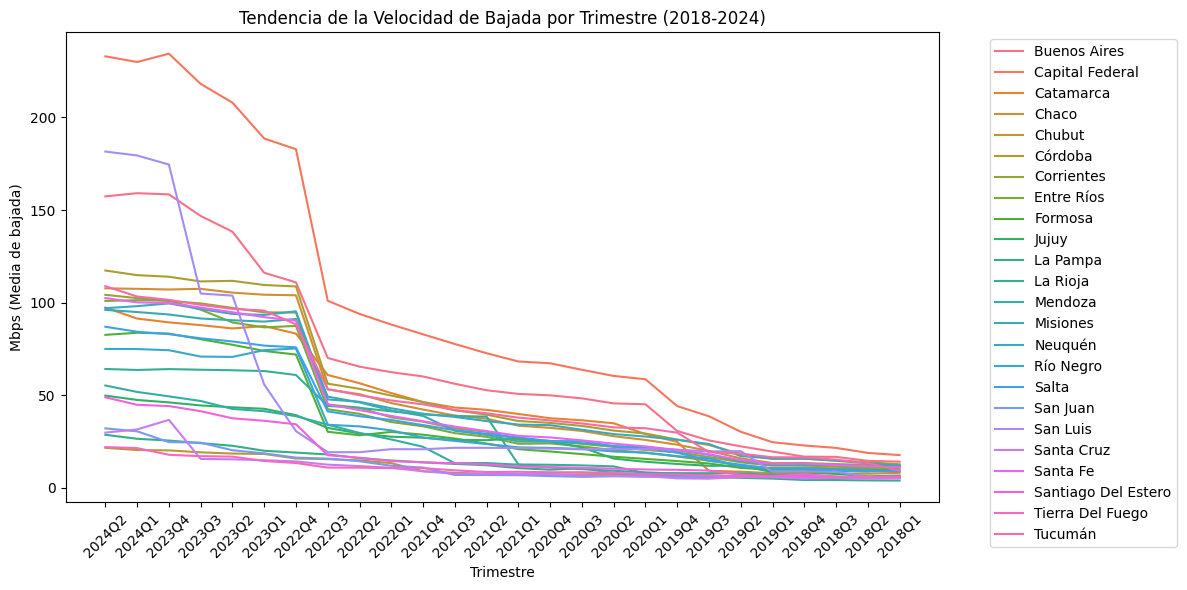

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Relación entre Provincia y Velocidad (Mbps)
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df,
    x="Provincia",
    y="Mbps (Media de bajada)"
)
plt.title("Distribución de la Velocidad de Bajada por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Mbps (Media de bajada)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Gráfico de barras: Media de la Velocidad de Bajada por Provincia
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df,
    x="Provincia",
    y="Mbps (Media de bajada)",
    estimator="mean"
)
plt.title("Media de la Velocidad de Bajada por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Media de Mbps (Media de bajada)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Relación entre Velocidad, Año y Trimestre
# Gráfico de líneas: Velocidad promedio por Año
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x="Año",
    y="Mbps (Media de bajada)",
    hue="Provincia",
    estimator="mean",
    errorbar=None
)
plt.title("Tendencia de la Velocidad de Bajada por Año (2018-2024)")
plt.xlabel("Año")
plt.ylabel("Mbps (Media de bajada)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gráfico de líneas: Velocidad promedio por Trimestre
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x="Trimestre",
    y="Mbps (Media de bajada)",
    hue="Provincia",
    estimator="mean",
    errorbar=None
)
plt.title("Tendencia de la Velocidad de Bajada por Trimestre (2018-2024)")
plt.xlabel("Trimestre")
plt.ylabel("Mbps (Media de bajada)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


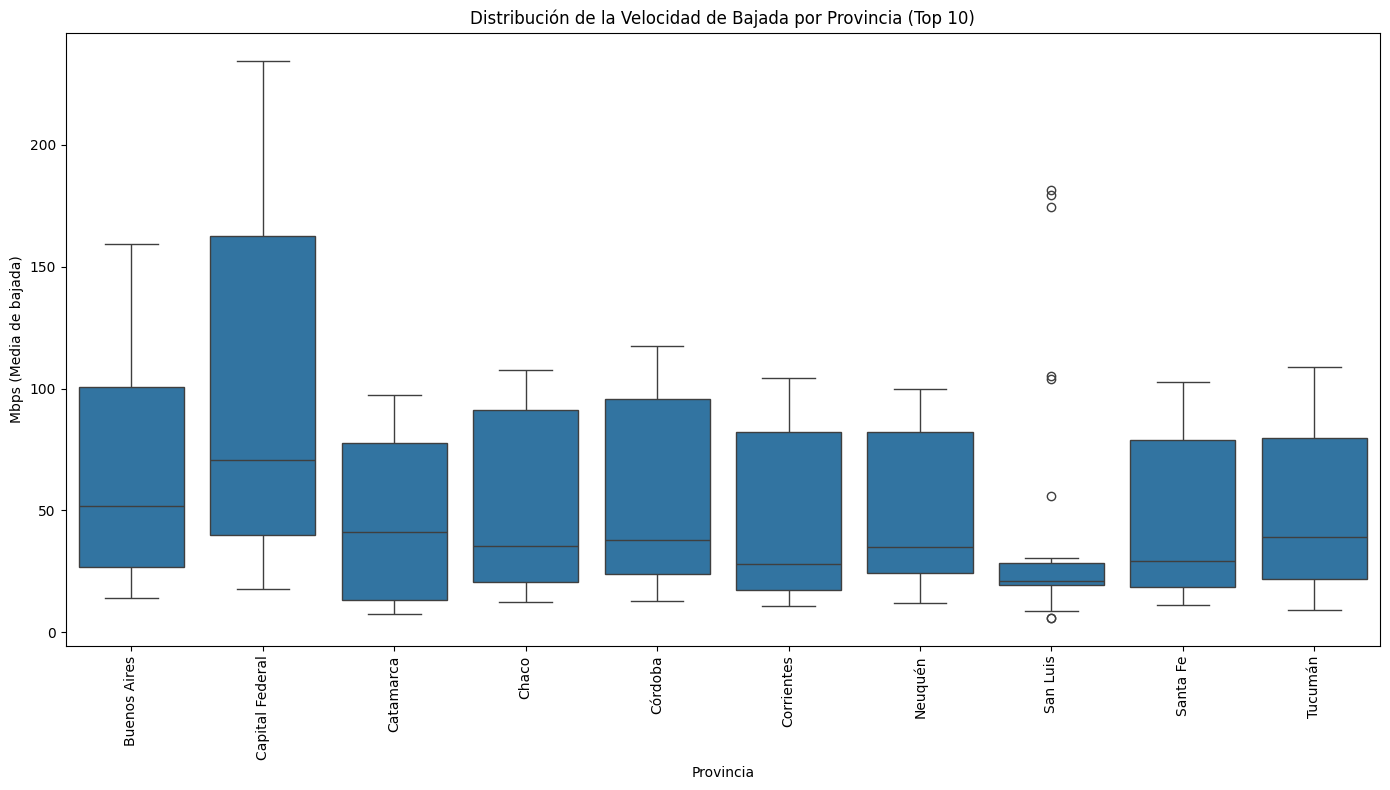

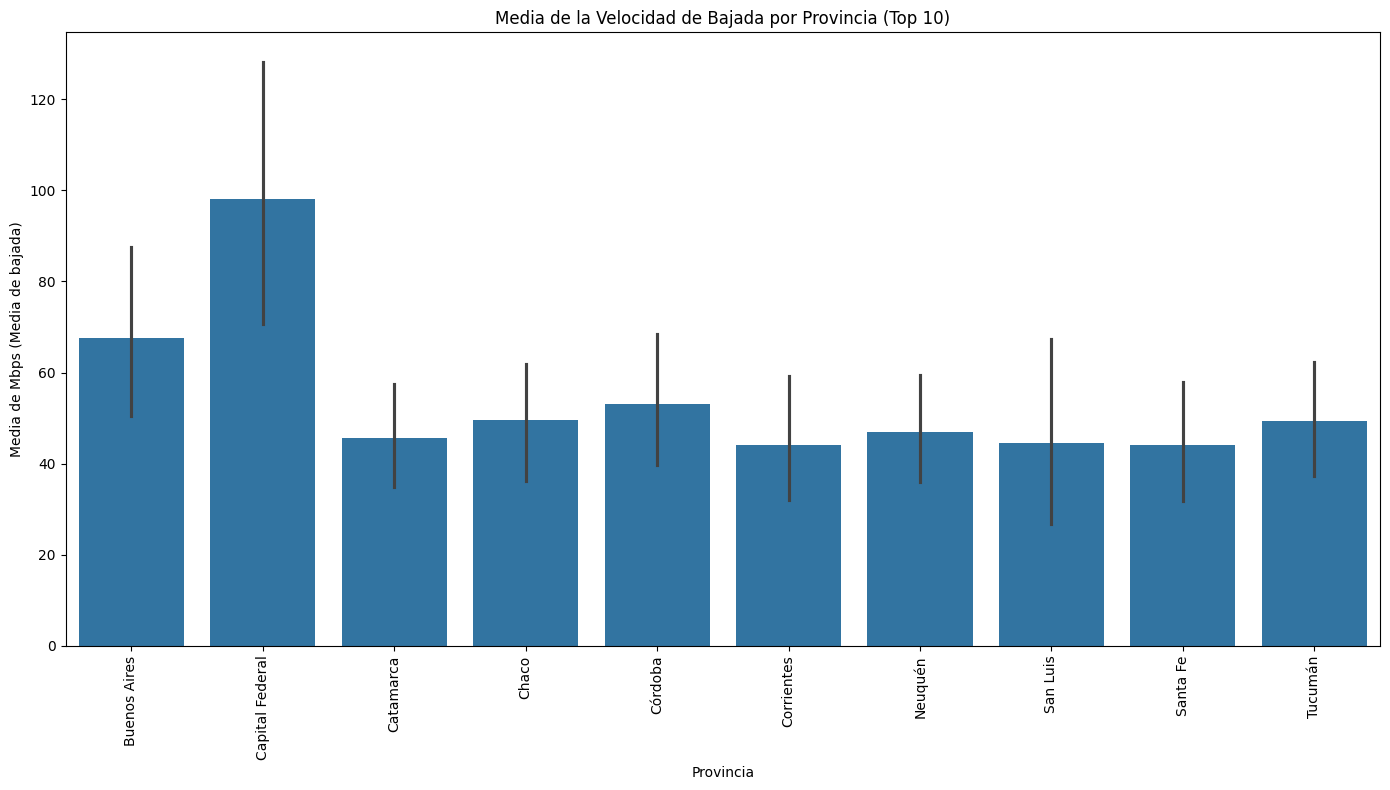

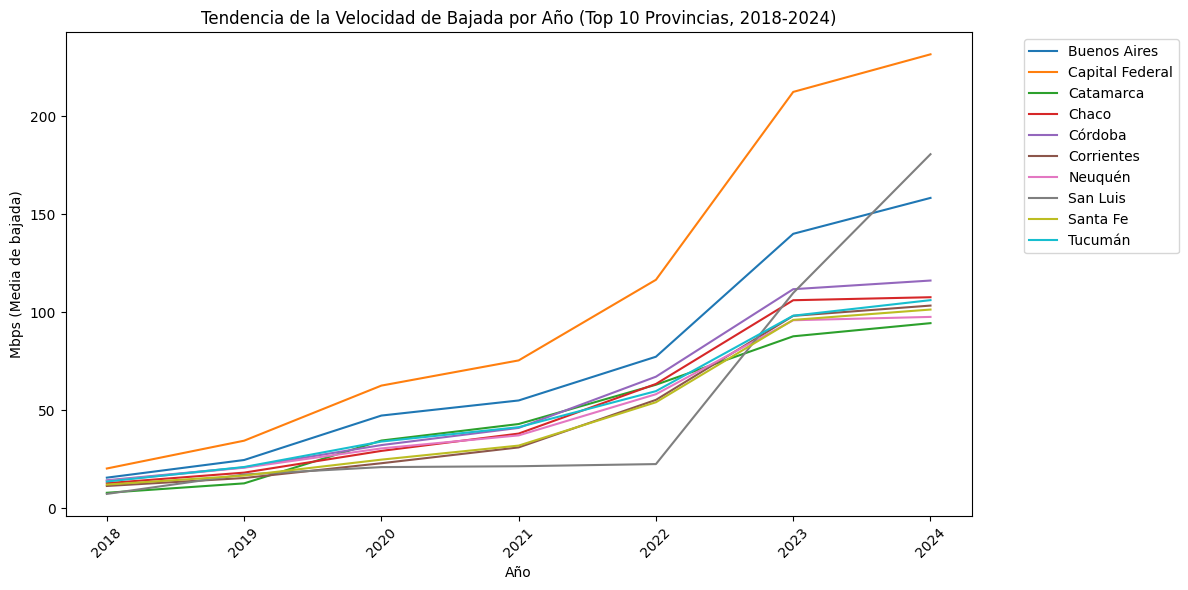

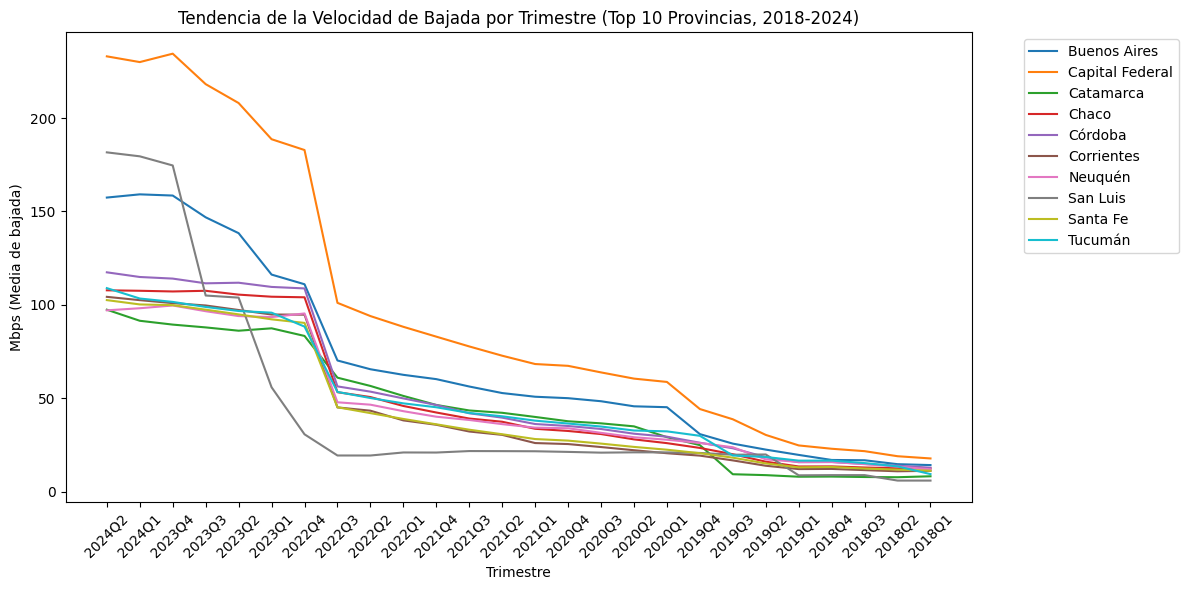

In [7]:
# Calcular la media de Mbps por Provincia
top_10_provincias = df.groupby("Provincia")["Mbps (Media de bajada)"].mean().sort_values(ascending=False).head(10).index

# Filtrar el DataFrame para que solo contenga las 10 provincias principales
df_top_10 = df[df["Provincia"].isin(top_10_provincias)]

# 1. Relación entre Provincia y Velocidad (Mbps)
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df_top_10,
    x="Provincia",
    y="Mbps (Media de bajada)"
)
plt.title("Distribución de la Velocidad de Bajada por Provincia (Top 10)")
plt.xlabel("Provincia")
plt.ylabel("Mbps (Media de bajada)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Gráfico de barras: Media de la Velocidad de Bajada por Provincia
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_top_10,
    x="Provincia",
    y="Mbps (Media de bajada)",
    estimator="mean"
)
plt.title("Media de la Velocidad de Bajada por Provincia (Top 10)")
plt.xlabel("Provincia")
plt.ylabel("Media de Mbps (Media de bajada)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Relación entre Velocidad, Año y Trimestre (Top 10 Provincias)
# Gráfico de líneas: Velocidad promedio por Año (Top 10 Provincias)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_top_10,
    x="Año",
    y="Mbps (Media de bajada)",
    hue="Provincia",
    estimator="mean",
    errorbar=None
)
plt.title("Tendencia de la Velocidad de Bajada por Año (Top 10 Provincias, 2018-2024)")
plt.xlabel("Año")
plt.ylabel("Mbps (Media de bajada)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gráfico de líneas: Velocidad promedio por Trimestre (Top 10 Provincias)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_top_10,
    x="Trimestre",
    y="Mbps (Media de bajada)",
    hue="Provincia",
    estimator="mean",
    errorbar=None
)
plt.title("Tendencia de la Velocidad de Bajada por Trimestre (Top 10 Provincias, 2018-2024)")
plt.xlabel("Trimestre")
plt.ylabel("Mbps (Media de bajada)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
